# Part 1 - Exploratory Data Analysis and Baseline Models

Problem 1:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Problem 2:

In [2]:
df = pd.read_csv("genes_train.csv")
df1 = pd.read_csv("genes_test.csv")

Problem 3: 

In [79]:
df.shape

(40, 7131)

There are 7131 features and 40 measurements in the training data. This seems quite unbalanced since 7000 features is quite a lot for 40 measurements each.

Problem 4: 

In [3]:
df["cancer type"].value_counts()

ALL    29
AML    11
Name: cancer type, dtype: int64

The number of patients with ALL is 29 and the number of patients with AML are 11. This output data seems unbalanced due the significant difference between the cancer types.

Problem 5: 


In [81]:
df.max(axis = 1)

C:\Users\ameen\AppData\Local\Temp\ipykernel_11316\66732827.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.max(axis = 1)


0     31086
1     29288
2     28056
3     31449
4     29543
5     38467
6     41911
7     40065
8     23602
9     28033
10    25966
11    30546
12    30797
13    28519
14    30256
15    27268
16    28952
17    32645
18    33143
19    27358
20    33548
21    39558
22    36417
23    27983
24    32785
25    31614
26    31261
27    29833
28    30354
29    25055
30    28350
31    25093
32    32946
33    28698
34    61228
35    37164
36    32204
37    29169
38    45815
39    29136
dtype: int64

In [82]:
df.min(axis = 1)

C:\Users\ameen\AppData\Local\Temp\ipykernel_11316\1562927657.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.min(axis = 1)


0    -19826
1    -17930
2    -27182
3    -23396
4    -10339
5    -21658
6    -24024
7    -27570
8    -25171
9    -12500
10   -17480
11   -15256
12   -12854
13   -14937
14   -13380
15   -10492
16   -19523
17    -8692
18   -11572
19   -13838
20    -7397
21   -17179
22   -14937
23   -17368
24   -17377
25   -10652
26   -20406
27   -20376
28    -9501
29   -17580
30   -25491
31   -28400
32   -27811
33   -17310
34   -16281
35   -27398
36   -23673
37   -23645
38   -21984
39   -21296
dtype: int64

In [83]:
df.mean(axis = 1)

C:\Users\ameen\AppData\Local\Temp\ipykernel_11316\3216275966.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(axis = 1)


0     641.277279
1     690.149790
2     698.210379
3     600.901543
4     679.438289
5     564.719355
6     584.356662
7     571.280084
8     789.604208
9     599.400421
10    632.166760
11    492.532819
12    674.563815
13    648.522581
14    705.682188
15    624.492847
16    791.292987
17    557.489902
18    558.555820
19    954.292006
20    577.572230
21    524.687798
22    532.180926
23    662.077279
24    597.783450
25    603.232398
26    501.277279
27    673.188920
28    556.389201
29    718.837868
30    598.569285
31    676.830435
32    723.466620
33    618.776578
34    514.429453
35    775.039832
36    689.156662
37    626.803366
38    582.118794
39    527.750912
dtype: float64

It is the case for both the max and min, but the mean doesn't seem to be so far apart. This is a problem because then this causes the data to be not as accurate as it should be. 
Yes, we do need to scale the data because this is a problem.

Problem 6: 

In [84]:
x_train = df.drop(["patient", "cancer type"], axis = 1)
y_train = df["cancer type"]


x_test = df1.drop(["patient", "cancer type"], axis = 1)
y_test = df1["cancer type"]

The columns that should be dropped are patient and cancer type because we don't need the patient number or the cancer types in the data for this.
The y output would be cancer type.

Problem 7:

Problem 7a:

In [85]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

Problem 7b:

In [86]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

y_pred1 = model.predict(x_test_scaled)
print(model.score(x_train_scaled, y_train))

1.0


In [87]:
cm = metrics.confusion_matrix(y_test, y_pred1)
print(cm)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred1))

[[18  0]
 [ 8  6]]
Accuracy:  0.75


The score for the model on the training data is 1 and the accuracy is 0.75.

The confusion matrix crrectly predicted 24 patients and incorrectly predicted 8 of the patients.

Problem 7c:

In [88]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train_scaled, y_train)

y_pred2 = model.predict(x_test_scaled)
print(model.score(x_train_scaled, y_train))

1.0


In [89]:
cm = metrics.confusion_matrix(y_test, y_pred2)
print(cm)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred2))

[[18  0]
 [ 7  7]]
Accuracy:  0.78125


The score of the model on the training data is 1 and the accuracy is 0.78125.

The confusion matrix correctly predicted 25 patients and incorrectly predicted 7 of the patients. 

Problem 7d:

The scores are low because we are transforming both sets of data, training and test. It is reasonable for it be less accurate because it is trying to fit it in a certain model. 

The confusion matrix shows that there false positives in the results. 

Problem 8:

Problem 8a: 

In [90]:
df_train_scaled = (x_train - x_train.mean())/x_train.std()

Problem 8b:

In [91]:
df_test_scaled = (x_test - x_train.mean())/x_train.std()

Problem 8c: 

In [92]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(df_train_scaled, y_train)

y_pred3 = model1.predict(df_test_scaled)
print(model1.score(df_train_scaled, y_train))

cm = metrics.confusion_matrix(y_test, y_pred3)
print(cm)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

1.0
[[18  0]
 [ 6  8]]
Accuracy:  0.8125


In [93]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(df_train_scaled, y_train)

y_pred4 = model2.predict(df_test_scaled)
print(model2.score(df_train_scaled, y_train))

cm = metrics.confusion_matrix(y_test, y_pred4)
print(cm)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred4))

1.0
[[16  2]
 [ 1 13]]
Accuracy:  0.90625


The model score I got from both logistic regression and Naive Bayes model was 1. The accuracy was better in the Naive Bayes model compared to the logistic regression model. This did increase the performance because we only used the training data to fit within the model.

# Part 2 - Feature Reduction Using Principal Component Analysis 

Problem 1: 

Problem 1a:

In [94]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

x_train_scaled_pca = pca.fit_transform(df_train_scaled)
x_test_scaled_pca = pca.fit_transform(df_test_scaled)
print(pca.explained_variance_ratio_.cumsum())

[0.52164574 0.60640497 0.65187725 0.689372   0.72101441 0.75093797
 0.77463233 0.79456914 0.81381202 0.82923728]


Problem 1b: 

In [95]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)

x_train_scaled_pca = pca.fit_transform(df_train_scaled)
x_test_scaled_pca = pca.fit_transform(df_test_scaled)
print(pca.explained_variance_ratio_.cumsum())

[0.52164574 0.60640497 0.65187725 0.68937201 0.72101446 0.75093824
 0.77463291 0.79457263 0.81381639 0.82924797 0.84398271 0.85737482
 0.86984019 0.88102933 0.89129294 0.90107198 0.91055876 0.91969666
 0.92837587 0.93696571]


In [96]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 30)

x_train_scaled_pca = pca.fit_transform(df_train_scaled)
x_test_scaled_pca = pca.fit_transform(df_test_scaled)
print(pca.explained_variance_ratio_.cumsum())

[0.52164574 0.60640497 0.65187725 0.68937201 0.72101446 0.75093824
 0.77463291 0.79457263 0.8138164  0.82924798 0.84398273 0.85737484
 0.86984072 0.88103121 0.89129493 0.90108005 0.91056867 0.91970726
 0.92839823 0.93698864 0.94503444 0.95263456 0.95971394 0.96624559
 0.97227254 0.97792666 0.98337456 0.98825999 0.99292778 0.99679308]


As the number of components was changed, there was no significant differene in the values within the arrays, the only effect that was being done is the additional values to be seen as the number of components increased. 

You need to have 30 components to explain the 90% of the variance.

In [97]:
pca = PCA(n_components = 30)

x_train_scaled_pca = pca.fit_transform(df_train_scaled)
x_test_scaled_pca = pca.transform(df_test_scaled)

In [98]:
model3 = LogisticRegression()
model3.fit(x_train_scaled_pca, y_train)
y_pred5 = model3.predict(x_test_scaled_pca)
print(model3.score(x_train_scaled_pca,y_train))

from sklearn import metrics 
cm = metrics.confusion_matrix(y_test, y_pred5)
print(cm)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred5))

1.0
[[18  0]
 [ 7  7]]
Accuracy: 0.78125


In [99]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(x_train_scaled_pca, y_train)
y_pred6 = model4.predict(x_test_scaled_pca)
print(model4.score(x_train_scaled_pca,y_train))

from sklearn import metrics 
cm = metrics.confusion_matrix(y_test, y_pred6)
print(cm)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred6))

0.975
[[18  0]
 [10  4]]
Accuracy: 0.6875


The models became less accurate compared to the models from Part 1. The accuracy has decreased to 0.78 for the Lienar Regression model and 0.687 for the Naive Bayes Model. These models are not generalizable to new patients compared to the first ones in Part 1. The effect was caused because we used a small set of values compared to the previous amount which was 7131 features. PCA was not appropriate to perform here because of the signficiant decrease in the number of features that were used compared to the first models in Part 1, thus affecting the accuracy greatly. 

# Part 3 - Class Balancing

Problem 1: 

In [100]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

x_bal_train, y_bal_train = sm.fit_resample(df_train_scaled, y_train)
x_bal_test, y_bal_test = sm.fit_resample(df_test_scaled, y_test)

C:\Users\ameen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cancer type', ylabel='count'>

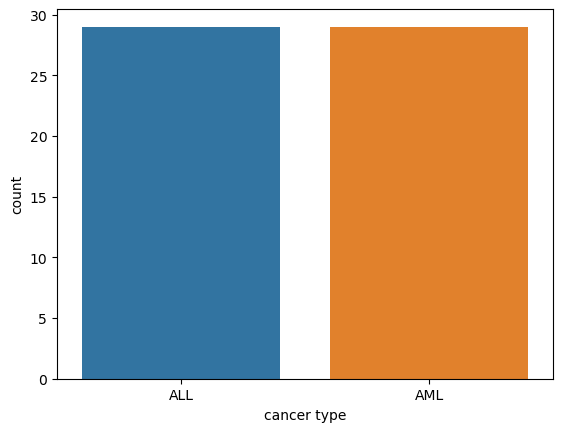

In [101]:
sns.countplot(y_bal_train)

C:\Users\ameen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cancer type', ylabel='count'>

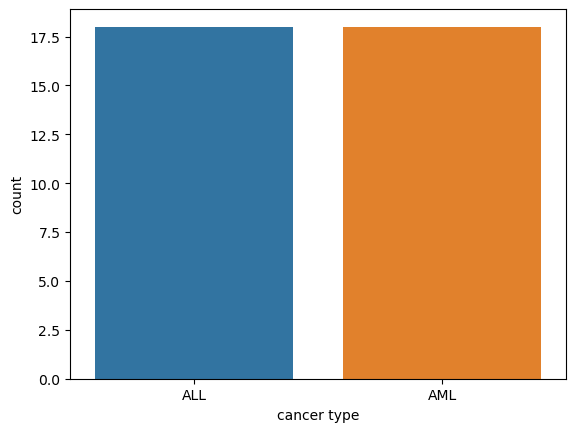

In [102]:
sns.countplot(y_bal_test)

The distribution of the outputs in the training data is 29 and the distribution of the outputs in the test data is 18. 

Problem 2:

In [103]:
model4 = LogisticRegression()
model4.fit(x_bal_train, y_bal_train)
y_pred7 = model4.predict(x_bal_test)
print(model4.score(x_bal_train,y_bal_train))

cm = metrics.confusion_matrix(y_bal_test, y_pred7)
print(cm)
print("Accuracy:", metrics.accuracy_score(y_bal_test, y_pred7))

1.0
[[18  0]
 [ 7 11]]
Accuracy: 0.8055555555555556


In [104]:
model5 = GaussianNB()
model5.fit(x_bal_train, y_bal_train)
y_pred8 = model5.predict(x_bal_test)
print(model5.score(x_bal_train, y_bal_train))

cm = metrics.confusion_matrix(y_bal_test, y_pred8)
print(cm)
print("Accuracy:", metrics.accuracy_score(y_bal_test, y_pred8))

1.0
[[16  2]
 [ 3 15]]
Accuracy: 0.8611111111111112


The accuracy for the liner regressional model was 0.805. It was also able to predict 29 patients correctly and 7 patients incorrectly. The Naive Bayes model has an accuracy of 0.86. It was also able to predict 31 patients correctly and 5 incorrectly. The models are lower in accuracy compared to the accuracy of the models in Part 1.  

# Part 4 - Summarizing

I would try and build a model from this data by firstly making the data balanced especially the outcomes. I would use SMOTE to reduce the values to have a similar amount of outcomes that could give a more significant result. The model type I would choose will definitely be a Naive Bayes Model. I would also use the standard scaling instead of PCA because within this case, using PCA actually decreased the accuracy more than what it was previously. The data sets that will be used will be the ones that identified a great majority of patients correctly and with those data sets, such as the x training data, it will be generalizable to new patients. 